# **Overview**

In this project I will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, I will determine essential factors to be one of the best tennis players in the world.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# prompt: import file from google direct

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving players.csv to players.csv
User uploaded file "players.csv" with length 194791 bytes


In [3]:
df_tennis = pd.read_csv('players.csv')
print(df_tennis.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [4]:
print(df_tennis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [ ]:
# Descriptive Statistics
print(df_tennis.describe())

              Year   FirstServe  FirstServePointsWon  \
count  1721.000000  1721.000000          1721.000000   
mean   2013.646717     0.598053             0.680738   
std       2.488018     0.054533             0.070422   
min    2009.000000     0.360000             0.270000   
25%    2012.000000     0.570000             0.650000   
50%    2014.000000     0.600000             0.690000   
75%    2016.000000     0.630000             0.720000   
max    2017.000000     0.880000             0.890000   

       FirstServeReturnPointsWon  SecondServePointsWon  \
count                1721.000000           1721.000000   
mean                    0.261673              0.479733   
std                     0.056639              0.066902   
min                     0.000000              0.060000   
25%                     0.240000              0.460000   
50%                     0.270000              0.490000   
75%                     0.290000              0.520000   
max                     0.48000

In [5]:
# Missing Value Analysis
print(df_tennis.isnull().sum())

Player                        0
Year                          0
FirstServe                    0
FirstServePointsWon           0
FirstServeReturnPointsWon     0
SecondServePointsWon          0
SecondServeReturnPointsWon    0
Aces                          0
BreakPointsConverted          0
BreakPointsFaced              0
BreakPointsOpportunities      0
BreakPointsSaved              0
DoubleFaults                  0
ReturnGamesPlayed             0
ReturnGamesWon                0
ReturnPointsWon               0
ServiceGamesPlayed            0
ServiceGamesWon               0
TotalPointsWon                0
TotalServicePointsWon         0
Wins                          0
Losses                        0
Winnings                      0
Ranking                       0
dtype: int64


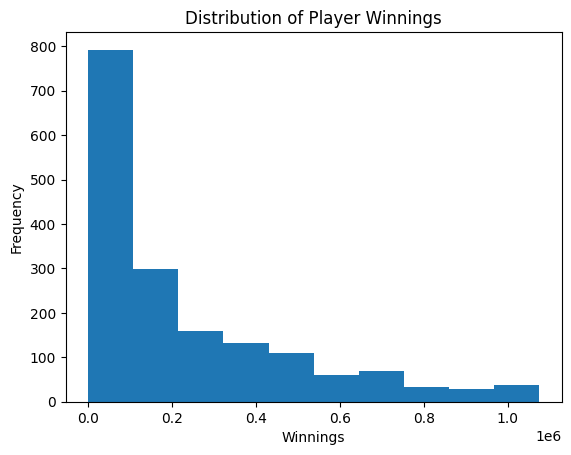

<Figure size 640x480 with 0 Axes>

In [11]:
# Data Visualization
plt.hist(df_tennis['Winnings'], bins=10)
plt.xlabel('Winnings')
plt.ylabel('Frequency')
plt.title('Distribution of Player Winnings')
plt.show()
plt.clf()

The distribution is right-skewed (longer tail on the right). It means that there are more players on the lower side of winnings and fewer with really high winnings. This is common in the sport where most tennis players earn less but few have significantly higher winnings.

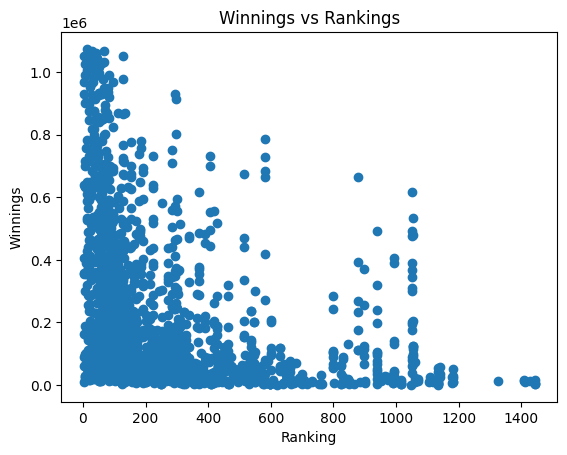

In [15]:
plt.scatter(x = 'Ranking', y='Winnings', data=df_tennis)
plt.xlabel('Ranking')
plt.ylabel('Winnings')
plt.title('Winnings vs Rankings')
plt.show()

Generally, there is a negative correlation between winnings and rankings. This means that as a player's ranking improves (decreases in value, as lower rankings are better), their winnings tend to increase. Players who are ranked around 1200 or more tend to have lower earnings in comparison to other players. However we can see that those middle ranking players tend to have various levels of earnings. At some point of ranking (around 700-800), players have the same earning level as those around ranking 1400. This suggests that other factors may contribute such controversial results.

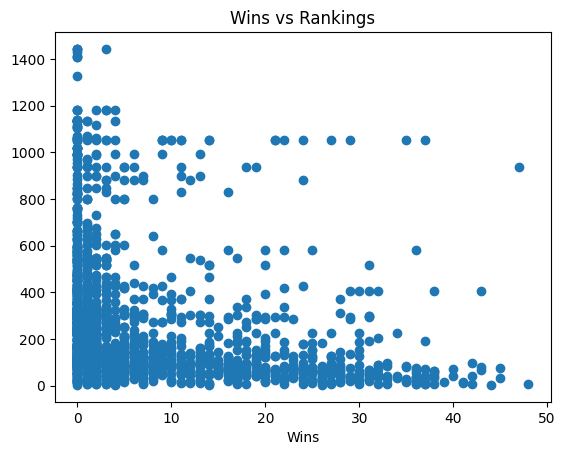

In [13]:
plt.scatter(x = 'Wins', y='Ranking', data=df_tennis)
plt.xlabel('Wins')
plt.title('Wins vs Rankings')
plt.show()

Relationship: The scatter plot of "Wins vs Rankings" generally shows a negative correlation. This means that as the number of wins increases, the ranking tends to decrease. In the context of tennis rankings, a lower ranking indicates a better player.

Reasoning: This relationship is expected in professional tennis. Players who win more matches accumulate more ranking points, which leads to a higher position in the rankings. Therefore, players with a higher number of wins are more likely to have a lower (better) ranking.

Outliers: While there is a general negative correlation, we might also observe some outliers in the scatter plot. These are data points that deviate significantly from the overall trend. Outliers could represent players who have relatively high rankings despite having a lower number of wins, or vice versa. Various factors, such as the strength of opponents or tournament performance, can contribute to these outliers.


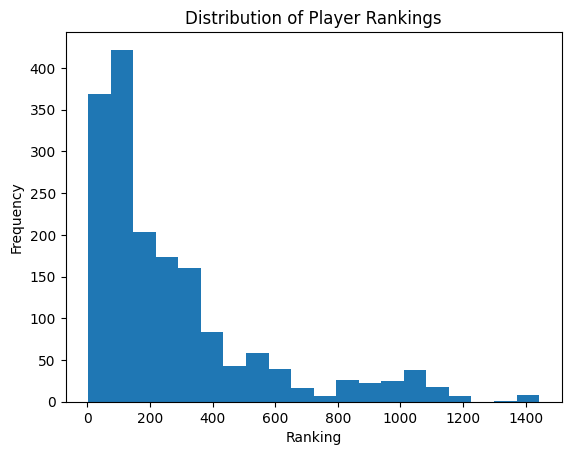

In [14]:
# histogram on ranking

plt.hist(df_tennis['Ranking'], bins=20)  # Adjust bins as needed
plt.xlabel('Ranking')
plt.ylabel('Frequency')
plt.title('Distribution of Player Rankings')
plt.show()

Histogram of Ranking: Similar to the histogram of winnings, this plot shows the distribution of player rankings. It appears that most of the players fall under 200.

 If a tennis player is ranked around 1400, it typically indicates that they are either an emerging player or someone participating in smaller tournaments, possibly on the ITF (International Tennis Federation) circuit. Players ranked this far down in the ATP or WTA rankings are often still working to accumulate points by competing in lower-tier events, such as Futures or Challengers in the men's game, and ITF World Tour events in the women's game.

Being at this ranking could mean the player is not yet frequently competing in ATP/WTA Tour-level events but is focusing on earning ranking points to move up and gain entry into more prestigious tournaments. It can take time and consistent results at smaller tournaments to improve this ranking.

                            FirstServePointsWon  FirstServeReturnPointsWon  \
FirstServePointsWon                    1.000000                   0.021729   
FirstServeReturnPointsWon              0.021729                   1.000000   
SecondServePointsWon                   0.320765                   0.072707   
SecondServeReturnPointsWon            -0.004724                   0.301265   
Aces                                   0.460323                   0.140165   
BreakPointsConverted                  -0.041538                   0.324057   
BreakPointsFaced                       0.301925                   0.295724   
BreakPointsOpportunities               0.324853                   0.313338   
BreakPointsSaved                       0.405751                   0.048347   
DoubleFaults                           0.373321                   0.244592   
ReturnGamesPlayed                      0.375465                   0.261871   
ReturnGamesWon                        -0.010193                 

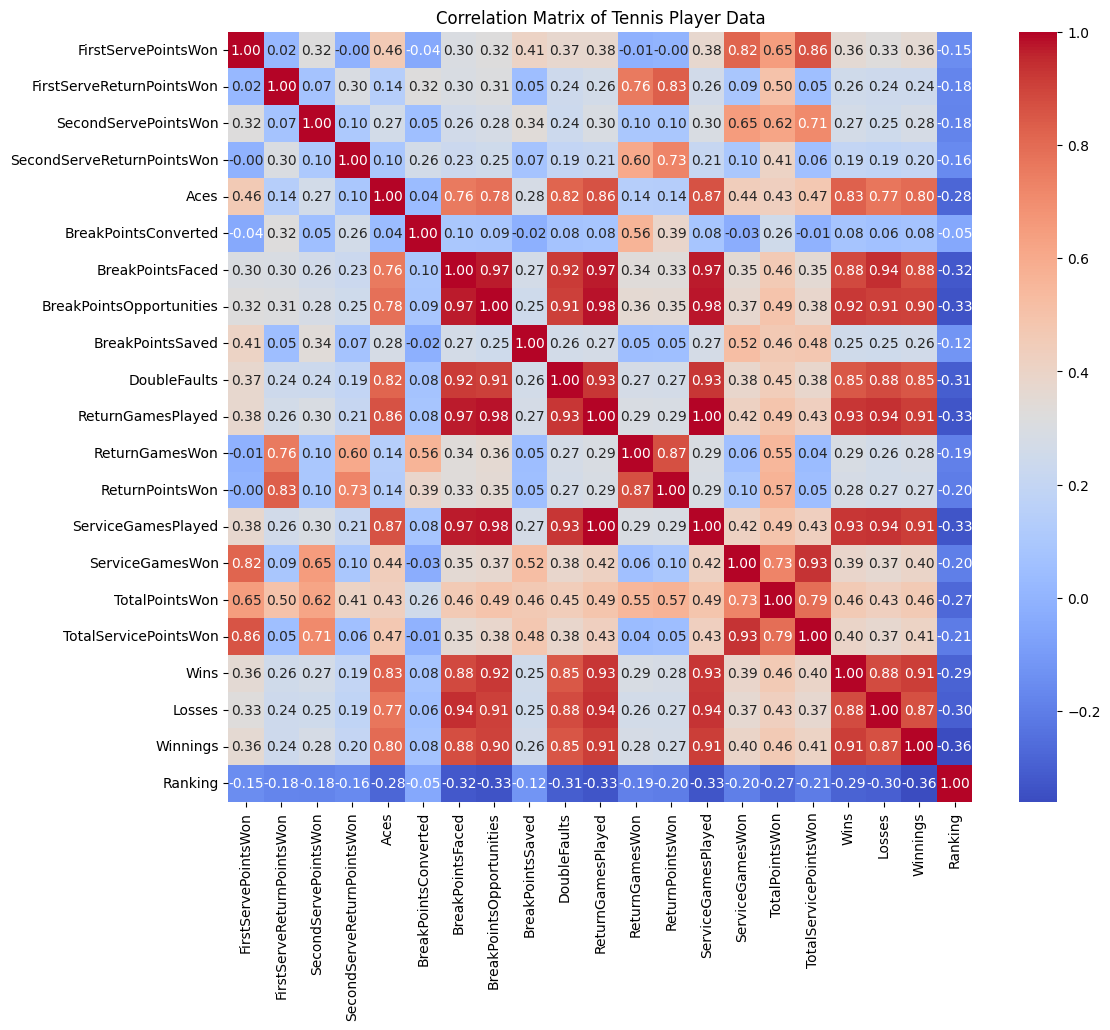

In [ ]:
# Correlation Matrix (excluding 'Player' column)
correlation_matrix = df_tennis.drop(['Player', 'FirstServe', 'Year'], axis=1).corr()
print(correlation_matrix)

# Heatmap of Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Tennis Player Data')
plt.show()

Strong Positive Correlations: Notice the strong positive correlations (dark red) between:

Wins and Winnings: This suggests that players with more wins generally have higher winnings.

Aces and ServiceGamesPlayed: This is expected, as more service games played would likely lead to more aces.

In tennis, "aces" refer to serves that the opponent cannot touch or return, resulting in an immediate point for the server. Specifically, an ace is when:

The serve lands within the service box (correctly placed).
The opponent does not make contact with the ball (they don't touch it with their racket).

BreakPointsFaced and ServiceGamesPlayed: More service games played could lead to more break points faced.

DoubleFaults and ServiceGamesPlayed: Similarly, more service games played could lead to more double faults.

TotalPointsWon and TotalServicePointsWon: These two features are highly correlated, indicating that winning more total points is strongly associated with winning more service points.

Ranking and Points: A higher ranking is associated with more points.

Losses and Ranking: A higher ranking is associated with fewer losses.

Wins and Points: More wins correlate with more points, contributing to a higher ranking.

Moderate Positive Correlations: There are moderate positive correlations (lighter red) between:

Aces and TotalServicePointsWon: More aces contribute to winning more service points.

BreakPointsFaced and TotalPointsWon: Facing more breakpoints might lead to a higher total points won.

Weak or No Correlations: The lighter colors or white areas indicate weak or no correlations between features.

Insights:

The heatmap reveals important relationships between features in the dataset. These relationships can be used to further understand the factors that influence a tennis player's performance.
Winning more matches is strongly associated with higher earnings, highlighting the importance of consistent performance.
Serving ability, represented by aces and service games played, is correlated with winnings and overall performance.
Analyzing these relationships can potentially help in building a predictive model for player outcomes.

In [21]:
df_reg = df_tennis.drop(['Player', 'FirstServe', 'Year', 'Winnings'], axis=1)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

cols = df_reg.columns
cols = np.array(cols)

y = df_tennis['Winnings']
r_scores = []
mses= []
slopes =[]
coefs = []

for i in cols:
  X = df_tennis[[i]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model_winnings_wins = LinearRegression()
  model_winnings_wins.fit(X_train, y_train)
  y_pred = model_winnings_wins.predict(X_test)

  slope = model_winnings_wins.coef_[0]
  slope = round(slope, 2)
  slopes.append(slope)
  coef = model_winnings_wins.intercept_
  coef = round(coef, 2)
  coefs.append(coef)

  mse = mean_squared_error(y_test, y_pred)
  mses.append(mse)
  r2 = r2_score(y_test, y_pred)
  r_scores.append(r2)


In [38]:
# prompt: create new dataframe

reg = pd.DataFrame({'Predictors': cols, 'Mean Squared Error': mses, 'R scores': r_scores, 'Dependent Variable': ['Winnings'] * len(cols), 'Slopes': slopes, 'Coefs': coefs})
print(reg)

                    Predictors  Mean Squared Error  R scores  \
0          FirstServePointsWon        5.070035e+10  0.142441   
1    FirstServeReturnPointsWon        5.654497e+10  0.043583   
2         SecondServePointsWon        5.294699e+10  0.104440   
3   SecondServeReturnPointsWon        5.668335e+10  0.041243   
4                         Aces        2.402698e+10  0.593601   
5         BreakPointsConverted        5.898863e+10  0.002251   
6             BreakPointsFaced        1.529682e+10  0.741265   
7     BreakPointsOpportunities        1.261922e+10  0.786555   
8             BreakPointsSaved        5.459403e+10  0.076582   
9                 DoubleFaults        1.553264e+10  0.737277   
10           ReturnGamesPlayed        1.042459e+10  0.823676   
11              ReturnGamesWon        5.454022e+10  0.077492   
12             ReturnPointsWon        5.567571e+10  0.058286   
13          ServiceGamesPlayed        1.036789e+10  0.824635   
14             ServiceGamesWon        4.

We can see that predictors with higher mean squared errors tend to have low r scores. Therefore, we can move on to filter out the high-performing predictors by r-score values. The R² score (coefficient of determination) indicates how well your model fits the data. It measures the proportion of variance in the dependent variable that is predictable from the independent variables. The range of R² is typically between 0 and 1, though it can sometimes be negative in poorly performing models.

R² > 0.7 is generally considered a good fit for most applications.
For complex systems or noisy data, a lower R² (e.g., around 0.5) might still be acceptable, depending on the field and context.

But in our case, independent variables were separate to predict the target. Therefore, I will measure their validity by 0.7.


---



In [39]:
# prompt: print r scores higher that 0.7
high_predictors = reg[reg['R scores'] > 0.7]
print(high_predictors)

                  Predictors  Mean Squared Error  R scores Dependent Variable  \
6           BreakPointsFaced        1.529682e+10  0.741265           Winnings   
7   BreakPointsOpportunities        1.261922e+10  0.786555           Winnings   
9               DoubleFaults        1.553264e+10  0.737277           Winnings   
10         ReturnGamesPlayed        1.042459e+10  0.823676           Winnings   
13        ServiceGamesPlayed        1.036789e+10  0.824635           Winnings   
17                      Wins        9.353971e+09  0.841784           Winnings   
18                    Losses        1.538307e+10  0.739807           Winnings   

      Slopes     Coefs  
6    1861.66  23970.22  
7    1860.66  41429.14  
9    3809.02  46215.98  
10   1046.77  25657.62  
13   1048.06  26110.38  
17  22594.83  54899.01  
18  24560.92   5239.73  


All high performing predictors - Break points, Break points opportunities, double faults, return game played, service game played, wins and losses- have positive relationship with players' earnings (winnings).


1. Break Points:
A break point occurs when the returning player (the one not serving) is one point away from winning the game on the opponent's serve. This is crucial because, in tennis, holding your serve (winning games when you serve) is often easier than breaking the opponent's serve.

For example, if the score is 30-40, the returner has a break point, meaning if they win the next point, they will "break" the server's game.
2. Break Point Opportunities:
This refers to the number of chances a player had to win a break point during a match. It counts how many times a player was in a position to break the opponent's serve but doesn't indicate whether they successfully converted those chances.

If a player had a score of 30-40 or advantage returner several times in a match, those would count as break point opportunities.
3. Double Faults:
A double fault occurs when a player fails both their first and second serves, losing the point. In tennis, players have two chances to serve. If they miss the first serve, they get a second chance. But if both serves are out, or hit the net, the opponent wins the point due to a double fault.

Double faults are considered unforced errors and can be a significant factor in losing games.
4. Return Game Played:
A return game refers to the game where the player is returning the serve, i.e., not serving themselves. This term highlights how many games a player has played while returning serves, as opposed to serving.

In a match, players alternate between service games (when they serve) and return games.
5. Service Game Played:
A service game is the game in which a player is the server. This means they are serving to start each point, and the outcome of the game depends on whether they hold their serve (win the game while serving) or lose it (get broken).

In professional tennis, players generally win a majority of their service games because serving gives an inherent advantage (with faster, stronger shots).

The interesting finding was that double faults and losses have positive correlation with players' earnings. That means tennis players may earn even if they lose the game.

According our new dataframe, the best single feature linear regression model came from using 'Wins' as the feature to predict 'Winnings'. IT might be clearassumption. Though we can also see other strong predictors such as number of return game and service game as well as break point opportunity.

Now let's see what if we cmmbine two predictors

In [42]:
nested_set = set()

# Creating pairs
for i in range(len(cols)):
    for j in range(len(cols)):
        if i < j:  # Ensure the first index is less than the second index
            nested_set.add((cols[i], cols[j]))

# Convert the set back to a list
nested_list = [list(pair) for pair in nested_set]

print(nested_list)

[['FirstServeReturnPointsWon', 'ServiceGamesPlayed'], ['BreakPointsFaced', 'ReturnGamesWon'], ['ServiceGamesPlayed', 'Wins'], ['BreakPointsConverted', 'ServiceGamesPlayed'], ['BreakPointsFaced', 'BreakPointsOpportunities'], ['ReturnPointsWon', 'Losses'], ['BreakPointsSaved', 'ReturnPointsWon'], ['SecondServeReturnPointsWon', 'BreakPointsFaced'], ['BreakPointsConverted', 'Losses'], ['FirstServePointsWon', 'ServiceGamesPlayed'], ['SecondServeReturnPointsWon', 'DoubleFaults'], ['SecondServePointsWon', 'ReturnGamesPlayed'], ['Aces', 'ServiceGamesWon'], ['ReturnGamesWon', 'Losses'], ['FirstServePointsWon', 'Losses'], ['Aces', 'BreakPointsConverted'], ['SecondServePointsWon', 'Wins'], ['TotalServicePointsWon', 'Wins'], ['ServiceGamesWon', 'Wins'], ['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon'], ['Aces', 'Ranking'], ['Aces', 'ReturnGamesWon'], ['ReturnGamesPlayed', 'ReturnPointsWon'], ['BreakPointsOpportunities', 'Ranking'], ['SecondServeReturnPointsWon', 'ReturnPointsWon'], ['Br

In [44]:
y = df_tennis['Winnings']
r_scores = []
mses= []
slopes =[]
coefs = []

for i in nested_list:
  X = df_tennis[[i[0], i[1]]]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model_winnings_wins = LinearRegression()
  model_winnings_wins.fit(X_train, y_train)
  y_pred = model_winnings_wins.predict(X_test)

  slope = model_winnings_wins.coef_[0]
  slope = round(slope, 2)
  slopes.append(slope)
  coef = model_winnings_wins.intercept_
  coef = round(coef, 2)
  coefs.append(coef)

  mse = mean_squared_error(y_test, y_pred)
  mses.append(mse)
  r2 = r2_score(y_test, y_pred)
  r_scores.append(r2)


In [46]:
two_var_reg = pd.DataFrame({'Predictors': nested_list, 'Mean Squared Error': mses, 'R scores': r_scores, 'Dependent Variable': ['Winnings'] * len(nested_list), 'Slopes': slopes, 'Coefs': coefs})
print(two_var_reg.head())

                                        Predictors  Mean Squared Error  \
0  [FirstServeReturnPointsWon, ServiceGamesPlayed]        1.036716e+10   
1               [BreakPointsFaced, ReturnGamesWon]        1.526744e+10   
2                       [ServiceGamesPlayed, Wins]        8.061475e+09   
3       [BreakPointsConverted, ServiceGamesPlayed]        1.036775e+10   
4     [BreakPointsFaced, BreakPointsOpportunities]        1.262136e+10   

   R scores Dependent Variable   Slopes     Coefs  
0  0.824647           Winnings  9711.22  23701.28  
1  0.741763           Winnings  1870.79  30016.11  
2  0.863646           Winnings   557.05  32935.67  
3  0.824637           Winnings  -657.58  26345.22  
4  0.786519           Winnings   -29.84  41871.11  


In [49]:
high_multi_predictors = two_var_reg[two_var_reg['R scores'] > 0.7]
print(high_multi_predictors.head(10))

                                         Predictors  Mean Squared Error  \
0   [FirstServeReturnPointsWon, ServiceGamesPlayed]        1.036716e+10   
1                [BreakPointsFaced, ReturnGamesWon]        1.526744e+10   
2                        [ServiceGamesPlayed, Wins]        8.061475e+09   
3        [BreakPointsConverted, ServiceGamesPlayed]        1.036775e+10   
4      [BreakPointsFaced, BreakPointsOpportunities]        1.262136e+10   
5                         [ReturnPointsWon, Losses]        1.530165e+10   
7    [SecondServeReturnPointsWon, BreakPointsFaced]        1.529657e+10   
8                    [BreakPointsConverted, Losses]        1.536539e+10   
9         [FirstServePointsWon, ServiceGamesPlayed]        1.032824e+10   
10       [SecondServeReturnPointsWon, DoubleFaults]        1.541347e+10   

    R scores Dependent Variable     Slopes     Coefs  
0   0.824647           Winnings    9711.22  23701.28  
1   0.741763           Winnings    1870.79  30016.11  
2   0.863

Upon all combinations the number of service game played and wins are the best predictor of the players' anual earning.

Objective: This project aims to predict a tennis player's winnings using linear regression based on their playing habits. It uses the Association of Tennis Professionals (ATP) dataset.

Methodology:

Data Exploration and Visualization: I started exploring the data using descriptive statistics, pair plots, histograms, and scatter plots.

Correlation Analysis: A correlation matrix and heatmap are generated to identify relationships between features.

Linear Regression Modeling: Single feature linear regression is applied to different features to evaluate their predictive power. R-squared is used to assess model performance.

Multiple Feature Linear Regression: Two feature combinations are used to build linear regression models and their R-squared values are compared.
Key Findings:

Single Feature Models: The "Wins" feature emerged as the best single predictor of player earnings.

Multiple Feature Models: The best combination for predicting earnings were the number of "Service Games Played" and "Wins."

Positive Correlations: Strong positive relationships were found between Break Points, Break Points Opportunities, Double Faults, Return Game Played, Service Game Played, Wins, Losses and Player's Winnings.

Conclusion:

The analysis suggests that a player's winnings are significantly related to their performance, particularly their wins and the number of service games played. The created model could potentially be used to predict player earnings with reasonable accuracy.